In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os


In [10]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    r'D:\Downloads\Dataset - Copy\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    r'D:\Downloads\Dataset - Copy\val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2146 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [11]:
print(train_generator.class_indices)


{'BACTERIAL': 0, 'VIRAL': 1}


In [12]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Two output classes

for layer in vgg16.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.5486 - loss: 1.7026 - val_accuracy: 0.9297 - val_loss: 0.5636
Epoch 2/10
 1/67 ━━━━━━━━━━━━━━━━━━━━ 4:39 4s/step - accuracy: 0.5625 - loss: 0.6329

C:\Users\dhruva rv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - accuracy: 0.5625 - loss: 0.6329 - val_accuracy: 0.9375 - val_loss: 0.5637
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 300s 4s/step - accuracy: 0.5858 - loss: 0.6487 - val_accuracy: 0.7109 - val_loss: 0.5088
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.6250 - loss: 0.5958 - val_accuracy: 0.7891 - val_loss: 0.4966
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.6436 - loss: 0.6294 - val_accuracy: 0.8672 - val_loss: 0.4913
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - accuracy: 0.6250 - loss: 0.5596 - val_accuracy: 0.8672 - val_loss: 0.4957
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.6348 - loss: 0.6247 - val_accuracy: 0.8594 - val_loss: 0.4796
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accuracy: 0.5625 - loss: 0.6459 - val_accuracy: 0.8828 - val_loss: 0.4723
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.6276 - loss: 0.6257 - val_accuracy: 0.8750 - val_

In [14]:
validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Validation Accuracy: {validation_accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8917 - loss: 0.4017
Validation Accuracy: 0.8828125


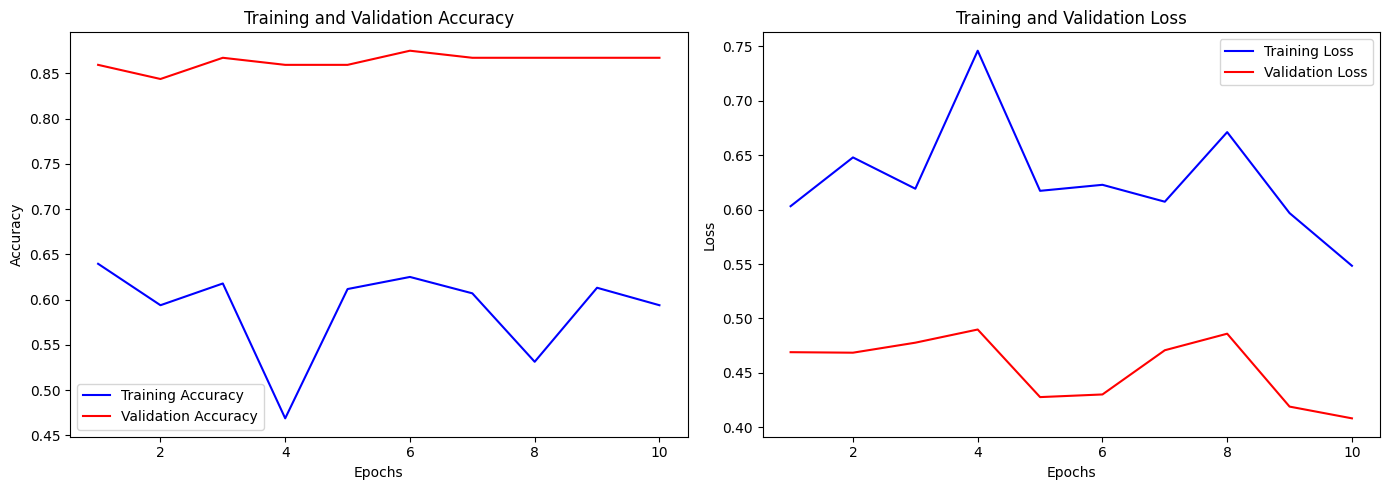

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Extracting data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting Training and Validation Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("VGG16_model.h5")